# Power manifold

In [1]:
%matplotlib inline

import sys
import numpy as np
import matplotlib
import torch
import logging
from matplotlib import pyplot as plt, cm
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import Axes3D

sys.path.append("../../")
from experiments.simulators import PowerManifoldSimulator
from experiments.utils.models import create_vector_transform
from manifold_flow.flows import ManifoldFlow

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
for key in logging.Logger.manager.loggerDict:
    if "experiments" not in key and "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## Set up simulator

In [2]:
sim = PowerManifoldSimulator(
    draw_constants=False,
    filename="../data/samples/power/manifold.npz"
)


## Load flow

In [3]:
outer_transform = create_vector_transform(
    3,
    5,
    linear_transform_type="permutation",
    base_transform_type="rq-coupling",
    context_features=None,
    dropout_probability=0.,
    tail_bound=6.,
    num_bins=10,
)
inner_transform = create_vector_transform(
    2,
    5,
    linear_transform_type="permutation",
    base_transform_type="rq-coupling",
    context_features=sim.parameter_dim(),
    dropout_probability=0.,
    tail_bound=6.,
    num_bins=10,
)

model = ManifoldFlow(
    data_dim=3,
    latent_dim=2,
    outer_transform=outer_transform,
    inner_transform=inner_transform,
    apply_context_to_outer=False,
)
model.load_state_dict(
    torch.load("../data/models/mf_2_power_alternate_march_run2.pt", map_location=torch.device("cpu"))
)
_ = model.eval()

13:48 manifold_flow.transforms.proje DEBUG   Set up projection from vector with dimension 3 to vector with dimension 2
13:48 manifold_flow.flows.base       DEBUG   Flow has 0.4 M parameters (0.4 M trainable) with an estimated size of 1.8 MB


In [16]:
outer_transform = create_vector_transform(
    3,
    5,
    linear_transform_type="permutation",
    base_transform_type="rq-coupling",
    context_features=None,
    dropout_probability=0.,
    tail_bound=6.,
    num_bins=10,
)
inner_transform = create_vector_transform(
    2,
    5,
    linear_transform_type="permutation",
    base_transform_type="rq-coupling",
    context_features=sim.parameter_dim(),
    dropout_probability=0.,
    tail_bound=6.,
    num_bins=10,
)

model2 = ManifoldFlow(
    data_dim=3,
    latent_dim=2,
    outer_transform=outer_transform,
    inner_transform=inner_transform,
    apply_context_to_outer=False,
)
model2.load_state_dict(
    torch.load("../data/models/pie_2_power_march_run1.pt", map_location=torch.device("cpu"))
)
_ = model2.eval()

14:23 manifold_flow.transforms.proje DEBUG   Set up projection from vector with dimension 3 to vector with dimension 2
14:23 manifold_flow.flows.base       DEBUG   Flow has 0.4 M parameters (0.4 M trainable) with an estimated size of 1.8 MB


In [5]:
outer_transform = create_vector_transform(
    3,
    5,
    linear_transform_type="permutation",
    base_transform_type="rq-coupling",
    context_features=None,
    dropout_probability=0.,
    tail_bound=6.,
    num_bins=10,
)
inner_transform = create_vector_transform(
    2,
    5,
    linear_transform_type="permutation",
    base_transform_type="rq-coupling",
    context_features=sim.parameter_dim(),
    dropout_probability=0.,
    tail_bound=6.,
    num_bins=10,
)

model3 = ManifoldFlow(
    data_dim=3,
    latent_dim=2,
    outer_transform=outer_transform,
    inner_transform=inner_transform,
    apply_context_to_outer=False,
)
model3.load_state_dict(
    torch.load("../data/models/gamf_2_power_march_run2.pt", map_location=torch.device("cpu"))
)
_ = model3.eval()

13:48 manifold_flow.transforms.proje DEBUG   Set up projection from vector with dimension 3 to vector with dimension 2
13:48 manifold_flow.flows.base       DEBUG   Flow has 0.4 M parameters (0.4 M trainable) with an estimated size of 1.8 MB


## Get data

In [6]:
def make_grid(boundary, res):
    grid_each = np.linspace(-boundary, boundary, res)
    x, y = np.meshgrid(grid_each, grid_each)
    xy = np.vstack((x.flatten(), y.flatten())).T
    return xy

In [7]:
thetas = [-1., 0., 1.]
boundary = 5.
res = 51

z_grid = make_grid(boundary, res)
f_grid = sim._fz(z_grid).flatten()
x_grid = sim._transform_z_to_x(z_grid)

In [8]:
true_logp_grid = np.array(
    [sim._log_density_z(z_grid, parameters=theta*np.ones((res**2,1))).flatten() for theta in thetas]
)


In [9]:
batchsize = 200
n_batches = (res**2 - 1) // batchsize + 1

model_x_grid = []
model_logp_grid = []

for theta in thetas:
    for i in range(n_batches):
        print(i + 1, "/", n_batches)
        x_batch = x_grid[i*batchsize:(i+1)*batchsize]
        n_batch = len(x_batch)
    
        theta_ = torch.tensor(theta*np.ones((n_batch,1)), dtype=torch.float)
        x_ = torch.tensor(x_batch, dtype=torch.float)
        
        x_reco_, logp_, u_ = model(x_, context=theta_)

        model_x_grid.append(x_reco_.detach().numpy().flatten())
        model_logp_grid.append(logp_.detach().numpy().flatten())

model_logp_grid = np.hstack(model_logp_grid).reshape((len(thetas), -1))
model_x_grid = np.hstack(model_x_grid).reshape((len(thetas), -1, 3))


1 / 14
2 / 14
3 / 14
4 / 14
5 / 14
6 / 14
7 / 14
8 / 14
9 / 14
10 / 14
11 / 14
12 / 14
13 / 14
14 / 14
1 / 14
2 / 14
3 / 14
4 / 14
5 / 14
6 / 14
7 / 14
8 / 14
9 / 14
10 / 14
11 / 14
12 / 14
13 / 14
14 / 14
1 / 14
2 / 14
3 / 14
4 / 14
5 / 14
6 / 14
7 / 14
8 / 14
9 / 14
10 / 14
11 / 14
12 / 14
13 / 14
14 / 14


In [17]:
batchsize = 200
n_batches = (res**2 - 1) // batchsize + 1

model2_x_grid = []
model2_logp_grid = []

for theta in thetas:
    for i in range(n_batches):
        print(i + 1, "/", n_batches)
        x_batch = x_grid[i*batchsize:(i+1)*batchsize]
        n_batch = len(x_batch)
    
        theta_ = torch.tensor(theta*np.ones((n_batch,1)), dtype=torch.float)
        x_ = torch.tensor(x_batch, dtype=torch.float)
        
        x_reco_, logp_, u_ = model2(x_, context=theta_)

        model2_x_grid.append(x_reco_.detach().numpy().flatten())
        model2_logp_grid.append(logp_.detach().numpy().flatten())

model2_logp_grid = np.hstack(model2_logp_grid).reshape((len(thetas), -1))
model2_x_grid = np.hstack(model2_x_grid).reshape((len(thetas), -1, 3))


1 / 14
2 / 14
3 / 14
4 / 14
5 / 14
6 / 14
7 / 14
8 / 14
9 / 14
10 / 14
11 / 14
12 / 14
13 / 14
14 / 14
1 / 14
2 / 14
3 / 14
4 / 14
5 / 14
6 / 14
7 / 14
8 / 14
9 / 14
10 / 14
11 / 14
12 / 14
13 / 14
14 / 14
1 / 14
2 / 14
3 / 14
4 / 14
5 / 14
6 / 14
7 / 14
8 / 14
9 / 14
10 / 14
11 / 14
12 / 14
13 / 14
14 / 14


In [11]:
batchsize = 200
n_batches = (res**2 - 1) // batchsize + 1

model3_x_grid = []
model3_logp_grid = []

for theta in thetas:
    for i in range(n_batches):
        print(i + 1, "/", n_batches)
        x_batch = x_grid[i*batchsize:(i+1)*batchsize]
        n_batch = len(x_batch)
    
        theta_ = torch.tensor(theta*np.ones((n_batch,1)), dtype=torch.float)
        x_ = torch.tensor(x_batch, dtype=torch.float)
        
        x_reco_, logp_, u_ = model3(x_, context=theta_)

        model3_x_grid.append(x_reco_.detach().numpy().flatten())
        model3_logp_grid.append(logp_.detach().numpy().flatten())

model3_logp_grid = np.hstack(model3_logp_grid).reshape((len(thetas), -1))
model3_x_grid = np.hstack(model3_x_grid).reshape((len(thetas), -1, 3))


1 / 14
2 / 14
3 / 14
4 / 14
5 / 14
6 / 14
7 / 14
8 / 14
9 / 14
10 / 14
11 / 14
12 / 14
13 / 14
14 / 14
1 / 14
2 / 14
3 / 14
4 / 14
5 / 14
6 / 14
7 / 14
8 / 14
9 / 14
10 / 14
11 / 14
12 / 14
13 / 14
14 / 14
1 / 14
2 / 14
3 / 14
4 / 14
5 / 14
6 / 14
7 / 14
8 / 14
9 / 14
10 / 14
11 / 14
12 / 14
13 / 14
14 / 14


## Plot

In [18]:
xs = [
    x_grid, model2_x_grid[1], model_x_grid[1], model3_x_grid[1],
    x_grid, model_x_grid[0], x_grid, model_x_grid[2]
]
logps = [
    true_logp_grid[1], model2_logp_grid[1], model_logp_grid[1], model3_logp_grid[1],
    true_logp_grid[0], model_logp_grid[0], true_logp_grid[2], model_logp_grid[2]
]
labels = [
    r"Ground truth, $\theta = 0$",
    r"PIE, $\theta = 0$",
    r"MLF-A, $\theta = 0$",
    r"MLF-OT, $\theta = 0$",
    #
    r"Ground truth, $\theta = -1$",
    r"MLF-A, $\theta = -1$",
    r"Ground truth, $\theta = 1$",
    r"MLF-A, $\theta = 1$"
]


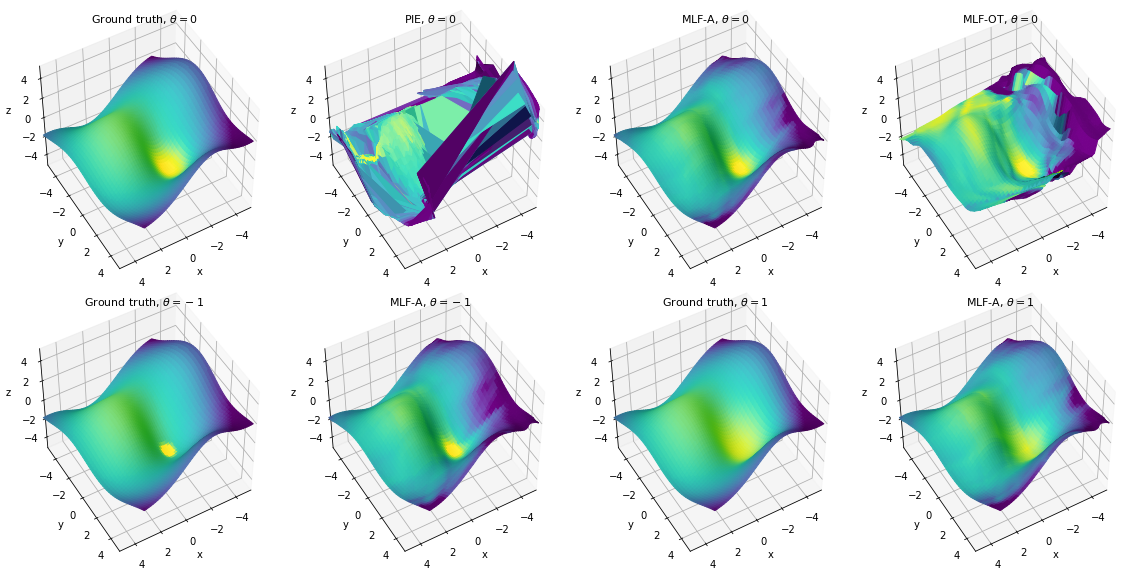

In [19]:
cmin, cmax = -10., -2.

def cmap(vals):
    return cm.viridis(np.clip((vals - cmin) / (cmax - cmin), 0., 1.))


fig = plt.figure(figsize=(4*4., 2*4.))

for i, (x, logp, label) in enumerate(zip(xs, logps, labels)):
    ax = fig.add_subplot(2, 4, i+1, projection="3d")
    
    rgb = cmap(logp).reshape((res, res, 4))
    ls = LightSource(azdeg=90, altdeg=75)
    rgb_shaded = ls.shade_rgb(
        rgb[:,:,:3], elevation=x[:,2].reshape((res, res)), fraction=1.0, vert_exag=0.5, blend_mode="soft"
    )
    
    ax.plot_surface(
        x[:,0].reshape((res, res)),
        x[:,1].reshape((res, res)),
        x[:,2].reshape((res, res)),
        facecolors=rgb_shaded,  # rgb_shaded,
        rstride=1, cstride = 1,
        linewidth=1.,
        shade=False
    )

    ax.set_xlim3d(-boundary, boundary)
    ax.set_ylim3d(-boundary, boundary)
    ax.set_zlim3d(-boundary, boundary)

    ax.set_title(label, fontsize=11.)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.view_init(50, 60)

plt.tight_layout()
plt.savefig("../figures/power_manifold.pdf")


## Other plots

NameError: name 'logp_grid' is not defined

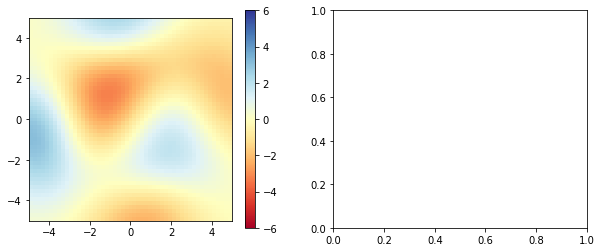

In [14]:
cmin, cmax = -6., 6.

fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2, 1)
sc = ax.imshow(
    f_grid.reshape((res, res)),
    extent=(-boundary, boundary, -boundary, boundary),
    cmap="RdYlBu",
    vmin=cmin,
    vmax=cmax,
    origin="lower"
)
cbar = plt.colorbar(sc)
ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)

ax = fig.add_subplot(1,2, 2)
sc = ax.imshow(
    logp_grid.reshape((res, res)),
    extent=(-boundary, boundary, -boundary, boundary),
    cmap="viridis",
    vmin=np.max(logp_grid),
    vmax=np.max(logp_grid)-10.,
    origin="lower"
)
cbar = plt.colorbar(sc)
ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)

plt.tight_layout()
plt.show()


In [ ]:
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1, projection="3d")
ax.plot_surface(
    x_grid[:,0].reshape((res, res)),
    x_grid[:,1].reshape((res, res)),
    x_grid[:,2].reshape((res, res)),
    color="orchid",
    rstride=1, cstride = 1,
    linewidth=1.
)

ax.set_xlim3d(-boundary, boundary)
ax.set_ylim3d(-boundary, boundary)
ax.set_zlim3d(-boundary, boundary)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.tight_layout()
plt.savefig("../figures/power_manifold.pdf")